# Explaining Decisions of Time Series Data

### 1. FCNs 예제 코드 분석

### 구글 드라이브와 Colab 연동

In [2]:
from google.colab import drive
drive.mount('/content/drive') # 출력되는 URL에 접속하여 verification code 복사 및 붙여넣기

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# 작업할 path로 변경
import os
os.chdir('/content/drive/My Drive/research/ICML-2020/FCN') 
os.listdir(os.getcwd()) # 현재 path에 존재하는 파일 목록 확인

['.git',
 '.gitattributes',
 '.gitignore',
 'Adiac',
 'Archi.jpg',
 'CAM.jpg',
 'FCN.py',
 'Feature.jpg',
 'MLP.py',
 'README.md',
 'ResNet.py',
 'StarLightCurves',
 'test_FCNs.ipynb']

In [0]:
# 현재 path 확인
os.getcwd()

In [0]:
# 경고 메시지 무시
import warnings
warnings.filterwarnings(action='ignore')

In [10]:
# 코드 및 학습 데이터(Adiac) 다운로드
!git clone https://github.com/cauchyturing/UCR_Time_Series_Classification_Deep_Learning_Baseline.git

Cloning into 'UCR_Time_Series_Classification_Deep_Learning_Baseline'...
remote: Enumerating objects: 129, done.
remote: Total 129 (delta 0), reused 0 (delta 0), pack-reused 129
Receiving objects: 100% (129/129), 1.80 MiB | 1.71 MiB/s, done.
Resolving deltas: 100% (72/72), done.


### 실험

In [0]:
from __future__ import print_function # python 2에서 python 3 문법을 사용하기 위함
 
from tensorflow import keras
import numpy as np
import pandas as pd

In [0]:
# UCR 데이터 읽어오기
def readucr(filename):
    # data = np.loadtxt(filename, delimiter = ',')
    data = np.loadtxt(filename)
    Y = data[:,0]
    X = data[:,1:]
    return X, Y

In [0]:
nb_epochs = 500 # 2000

In [0]:
# Init and Read data
fname = 'StarLightCurves' # each
x_train, y_train = readucr(fname+'/'+fname+'_TRAIN.txt')
x_test, y_test = readucr(fname+'/'+fname+'_TEST.txt')

In [20]:
x_train.shape

(1000, 1024)

In [21]:
y_train.shape

(1000,)

In [22]:
x_test.shape

(8236, 1024)

In [23]:
y_test.shape

(8236,)

In [0]:
nb_classes = len(np.unique(y_test)) # np.unique(y_test): y_test 배열 내 중복 원소 제거 후 유일한 원소를 정렬해서 반환
batch_size = min(x_train.shape[0]/10, 16) # x_train.shape: (size=390, length=176, 1, 1)

In [26]:
batch_size

16

In [0]:
# normalization: Min-Max Scaler, range: (0 ~ 1)*nb_classes
y_train = (y_train - y_train.min())/(y_train.max()-y_train.min())*(nb_classes-1)
y_test = (y_test - y_test.min())/(y_test.max()-y_test.min())*(nb_classes-1)


In [0]:
# One-Hot-Encoding
Y_train = keras.utils.to_categorical(y_train, nb_classes)
Y_test = keras.utils.to_categorical(y_test, nb_classes)


In [0]:
# Standardization: Standard Scaler or z-score normalization (평균 0, 표준 편차 1인 표준분포 꼴 데이터로 만듬)
x_train_mean = x_train.mean()
x_train_std = x_train.std()
x_train = (x_train - x_train_mean)/(x_train_std)
x_test = (x_test - x_train_mean)/(x_train_std)
x_train = x_train.reshape(x_train.shape + (1,1,))
x_test = x_test.reshape(x_test.shape + (1,1,))


In [30]:
# Input layer
x = keras.layers.Input(x_train.shape[1:])

# Conv1 layer
# drop_out = Dropout(0.2)(x)
conv1 = keras.layers.Conv2D(128, 8, 1, padding='same')(x)
conv1 = keras.layers.BatchNormalization()(conv1)
conv1 = keras.layers.Activation('relu')(conv1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# Conv2 Layer
# drop_out = Dropout(0.2)(conv1)
conv2 = keras.layers.Conv2D(256, 5, 1, padding='same')(conv1)
conv2 = keras.layers.BatchNormalization()(conv2)
conv2 = keras.layers.Activation('relu')(conv2)

In [0]:
# Conv3 Layer
# drop_out = Dropout(0.2)(conv2)
conv3 = keras.layers.Conv2D(128, 3, 1, padding='same')(conv2)
conv3 = keras.layers.BatchNormalization()(conv3)
conv3 = keras.layers.Activation('relu')(conv3)

In [0]:
# Fully Connected Output layer
full = keras.layers.GlobalAveragePooling2D()(conv3)    
out = keras.layers.Dense(nb_classes, activation='softmax')(full)

In [0]:
model = keras.models.Model(inputs=x, outputs=out)

In [35]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1024, 1, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 1024, 1, 128)      8320      
_________________________________________________________________
batch_normalization (BatchNo (None, 1024, 1, 128)      512       
_________________________________________________________________
activation (Activation)      (None, 1024, 1, 128)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1024, 1, 256)      819456    
_________________________________________________________________
batch_normalization_1 (Batch (None, 1024, 1, 256)      1024      
_________________________________________________________________
activation_1 (Activation)    (None, 1024, 1, 256)      0     

In [0]:
optimizer = keras.optimizers.Adam()

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy']) 


In [0]:
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor = 'loss', factor=0.5, patience=50, min_lr=0.0001)

In [39]:
hist = model.fit(x_train, Y_train, batch_size=batch_size, nb_epoch=nb_epochs, verbose=1, validation_data=(x_test, Y_test), callbacks = [reduce_lr])

Train on 1000 samples, validate on 8236 samples
Epoch 1/500
1000/1000 [==============================] - 10s 10ms/sample - loss: 0.4867 - acc: 0.8070 - val_loss: 1.2140 - val_acc: 0.2799
Epoch 2/500
1000/1000 [==============================] - 6s 6ms/sample - loss: 0.4196 - acc: 0.8280 - val_loss: 1.4167 - val_acc: 0.2799
Epoch 3/500
1000/1000 [==============================] - 6s 6ms/sample - loss: 0.4101 - acc: 0.8280 - val_loss: 1.9295 - val_acc: 0.2797
Epoch 4/500
1000/1000 [==============================] - 6s 6ms/sample - loss: 0.4031 - acc: 0.8220 - val_loss: 1.6907 - val_acc: 0.2094
Epoch 5/500
1000/1000 [==============================] - 6s 6ms/sample - loss: 0.4010 - acc: 0.8220 - val_loss: 1.1093 - val_acc: 0.3038
Epoch 6/500
1000/1000 [==============================] - 6s 6ms/sample - loss: 0.3830 - acc: 0.8320 - val_loss: 0.5710 - val_acc: 0.8465
Epoch 7/500
1000/1000 [==============================] - 6s 6ms/sample - loss: 0.3761 - acc: 0.8310 - val_loss: 0.5291 - val_acc

In [40]:
#Print the testing results which has the lowest training loss.
log = pd.DataFrame(hist.history)
print(log.loc[log['loss'].idxmin]['loss'], log.loc[log['loss'].idxmin]['val_acc'])

0.0640487858466804 0.9097862839698792


In [0]:
############## Get CAM ################
import matplotlib.pyplot as plt
# from matplotlib.backends.backend_pdf import PdfPages

get_last_conv = keras.backend.function([model.layers[0].input, keras.backend.learning_phase()], [model.layers[-3].output])
last_conv = get_last_conv([x_test[:100], 1])[0]

get_softmax = keras.backend.function([model.layers[0].input, keras.backend.learning_phase()], [model.layers[-1].output])
softmax = get_softmax(([x_test[:100], 1]))[0]
softmax_weight = model.get_weights()[-2]
CAM = np.dot(last_conv, softmax_weight)

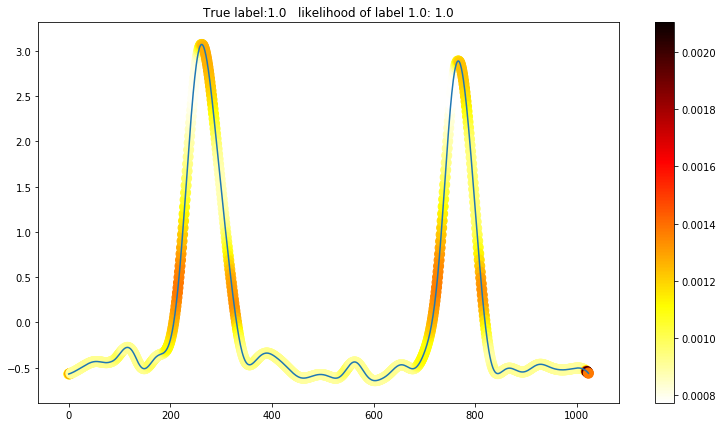

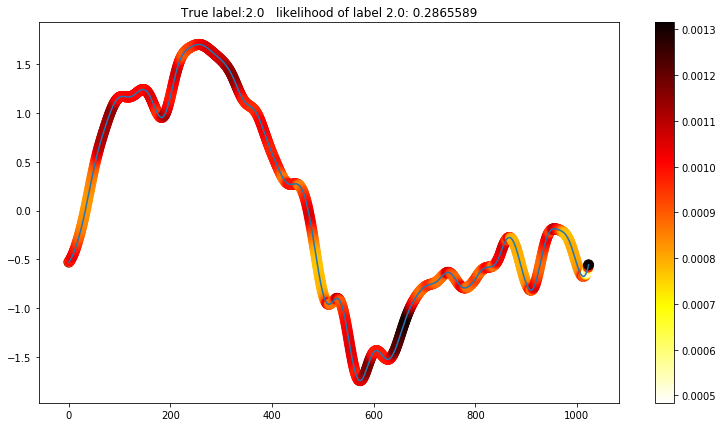

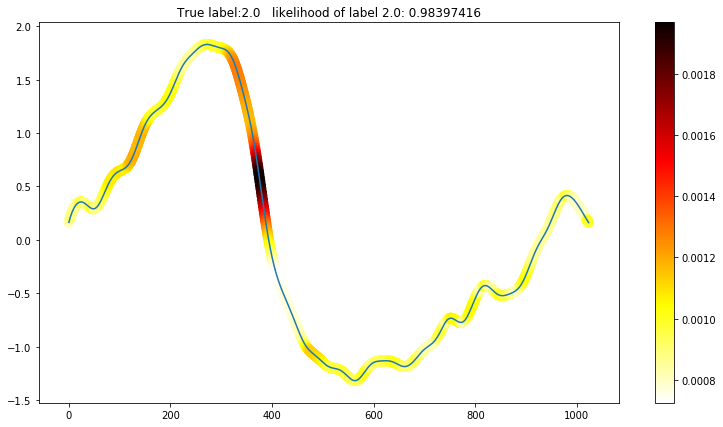

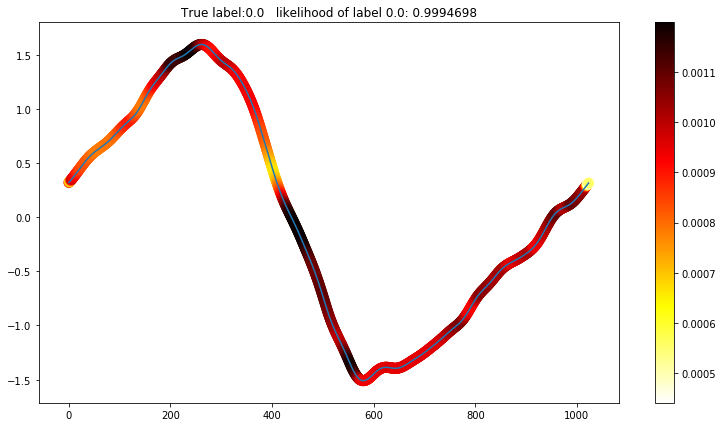

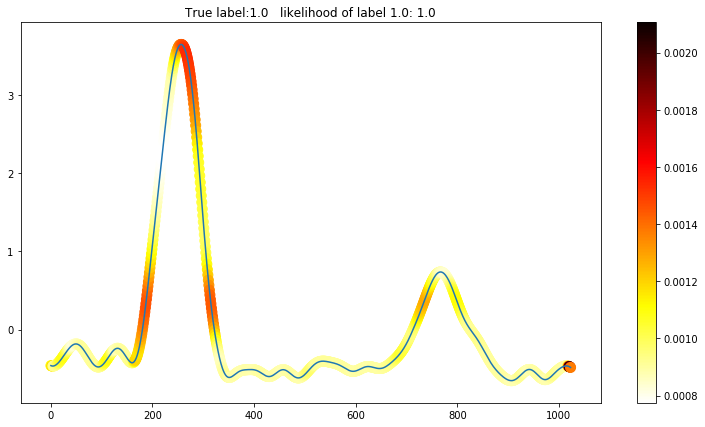

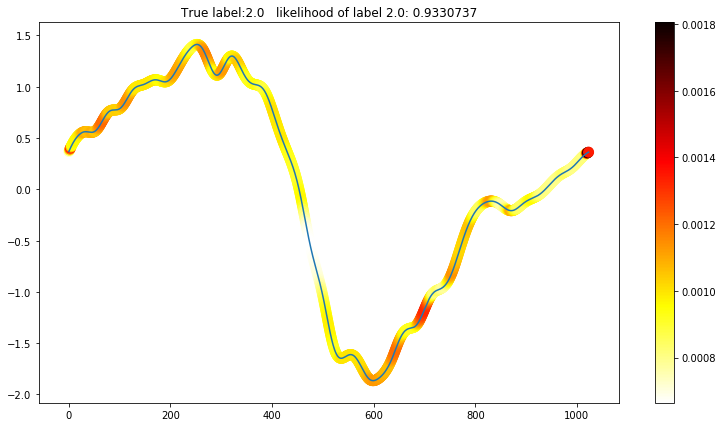

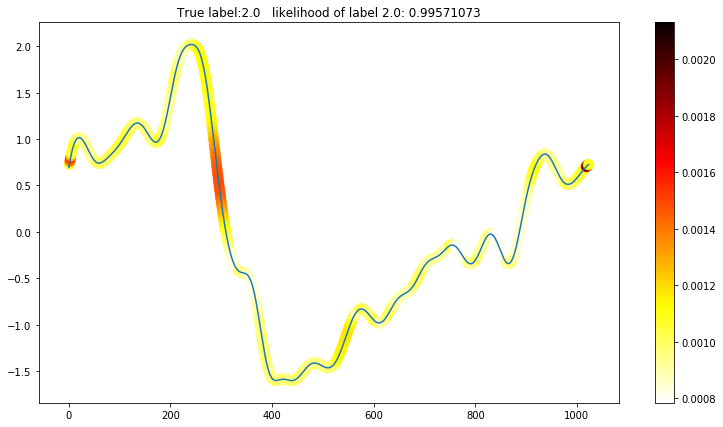

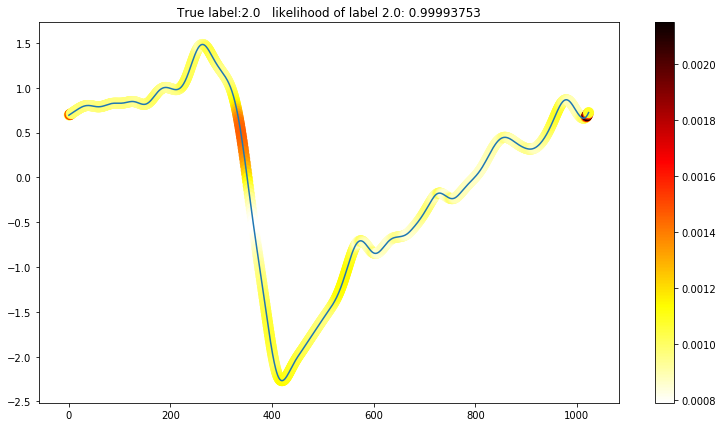

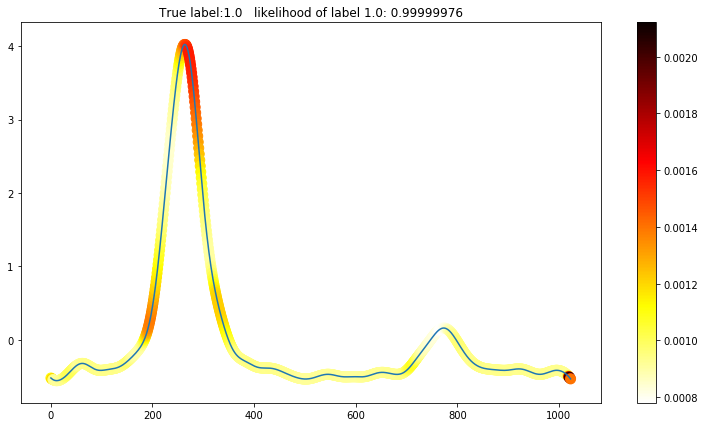

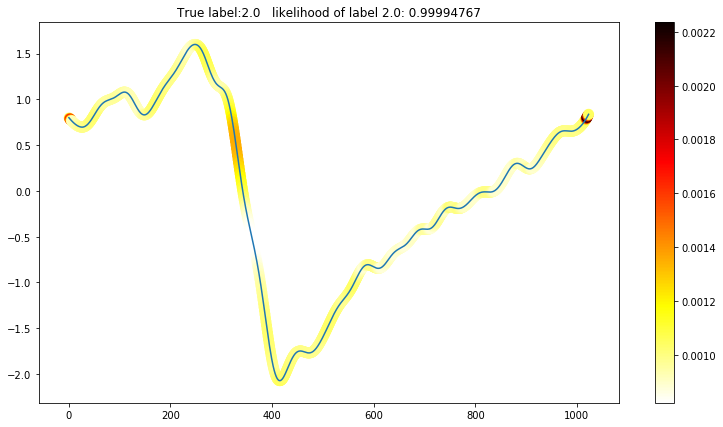

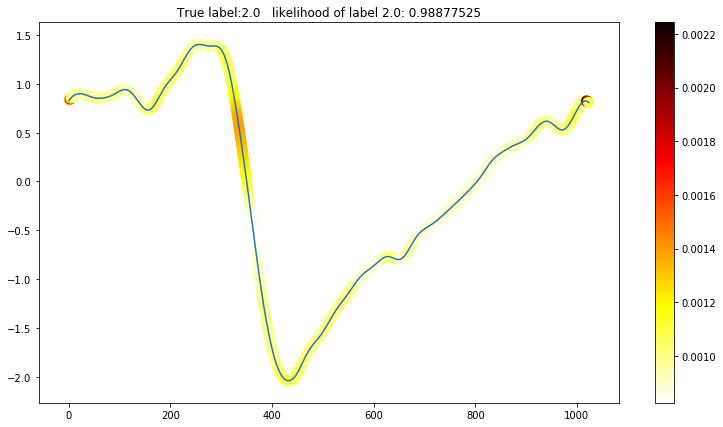

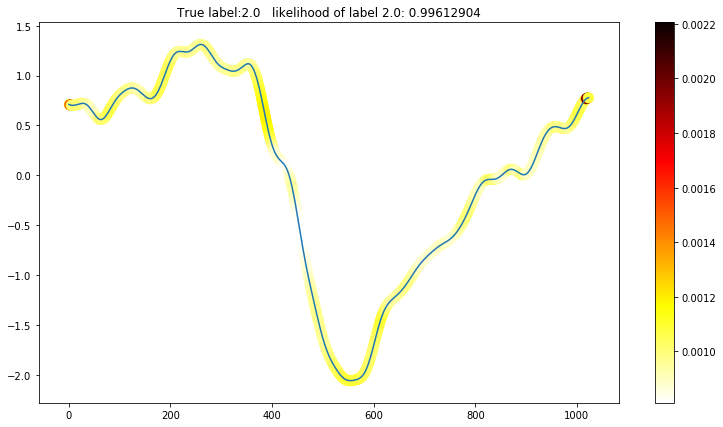

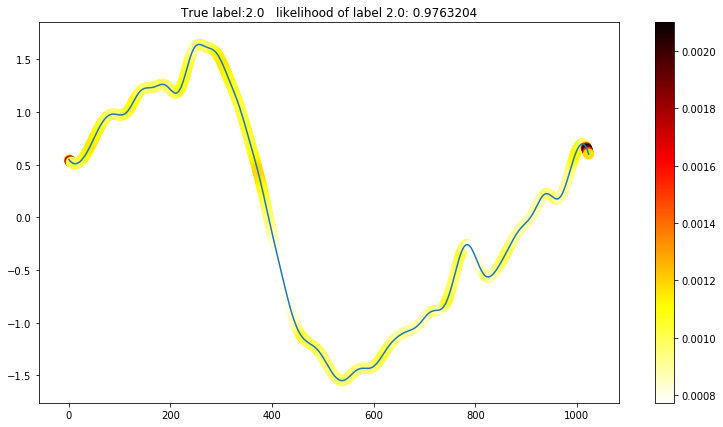

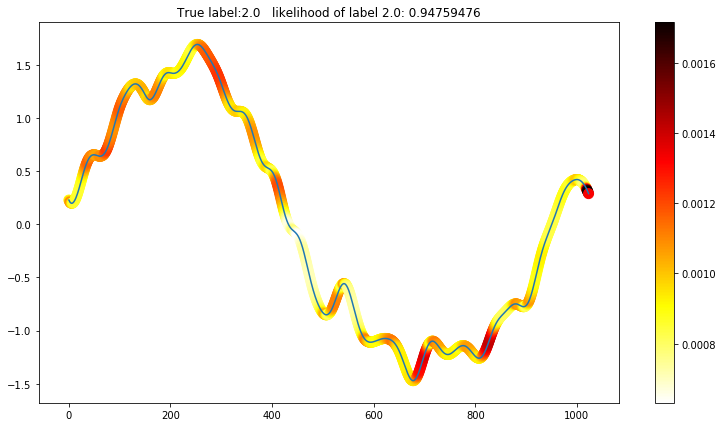

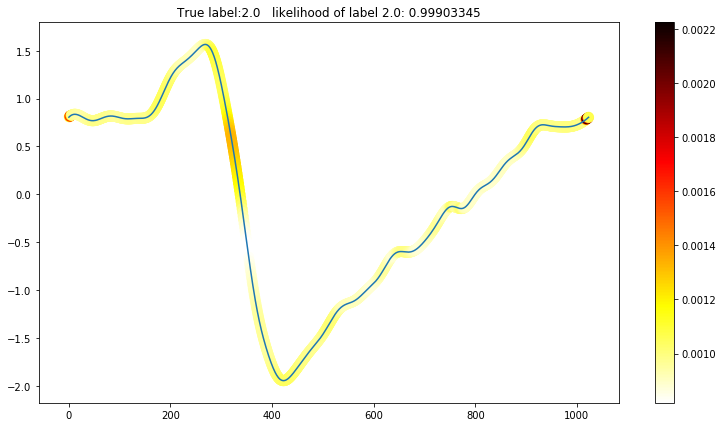

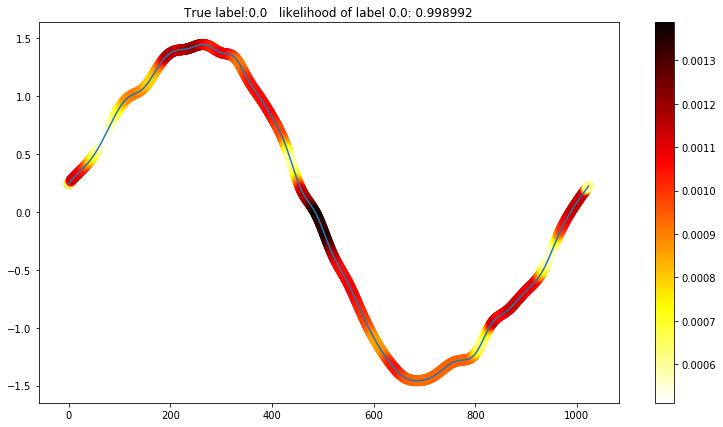

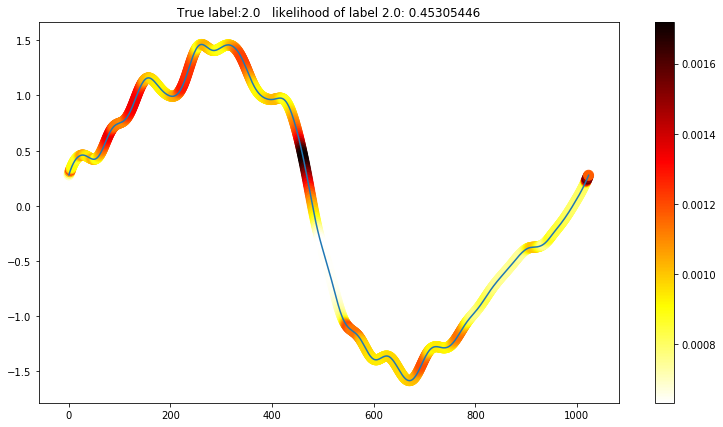

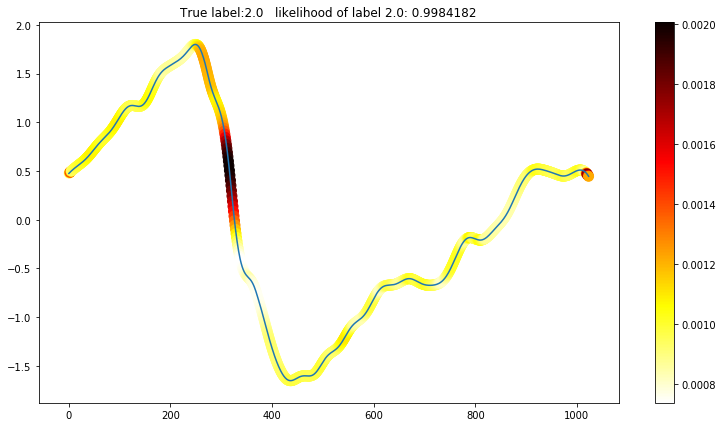

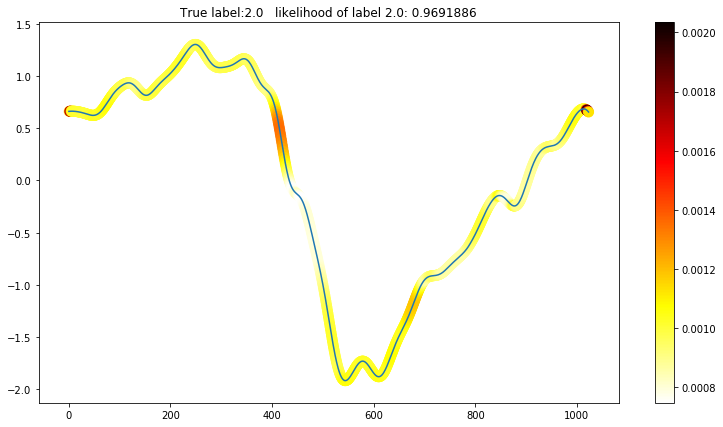

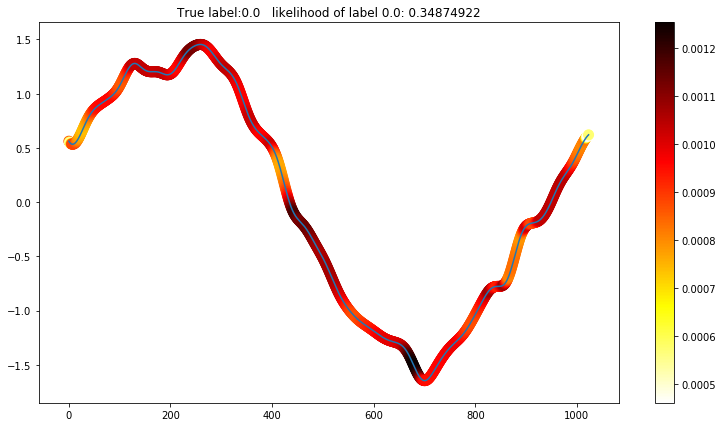

In [42]:
# pp = PdfPages('CAM.pdf')
for k in range(20):
    CAM = (CAM - CAM.min(axis=1, keepdims=True)) / (CAM.max(axis=1, keepdims=True) - CAM.min(axis=1, keepdims=True))
    c = np.exp(CAM) / np.sum(np.exp(CAM), axis=1, keepdims=True)
    plt.figure(figsize=(13, 7));
    plt.plot(x_test[k].squeeze());
    plt.scatter(np.arange(len(x_test[k])), x_test[k].squeeze(), cmap='hot_r', c=c[k, :, :, int(y_test[k])].squeeze(), s=100);
    plt.title(
        'True label:' + str(y_test[k]) + '   likelihood of label ' + str(y_test[k]) + ': ' + str(softmax[k][int(y_test[k])]))
    plt.colorbar();
#     pp.savefig()
#
# pp.close()